<h1> Data preparation </h1>

<h2>Importing pandas, numpy and plots libraries</h2>

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

<h2>Reading the data and printing out the head</h2>

In [238]:
data = pd.read_csv('BTCE-USDBTC.csv')
print(data.head())
print('\n Data Types:')
print(data.dtypes)

         Date     High      Low   Average     Last      Buy     Sell  \
0  2016-12-13  775.000  760.548  767.7740  769.160  767.393  767.392   
1  2016-12-12  765.873  754.000  759.9365  760.549  760.551  760.549   
2  2016-12-11  770.000  759.100  764.5500  765.000  765.002  765.000   
3  2016-12-10  765.550  757.730  761.6400  762.190  762.190  759.557   
4  2016-12-09  769.000  755.015  762.0075  760.956  761.498  760.957   

         Volume  Volume (Currency)  
0  2.743914e+06         3574.24502  
1  1.699641e+06         2236.62965  
2  1.861618e+06         2432.02763  
3  2.196884e+06         2881.60565  
4  2.579337e+06         3390.43705  

 Data Types:
Date                  object
High                 float64
Low                  float64
Average              float64
Last                 float64
Buy                  float64
Sell                 float64
Volume               float64
Volume (Currency)    float64
dtype: object


<h2> Parsing the date column</h1>

In [239]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
data = pd.read_csv('BTCE-USDBTC.csv', parse_dates=['Date'], index_col='Date', date_parser=dateparse)
data.head()

,High,Low,Average,Last,Buy,Sell,Volume,Volume (Currency)
Date,,,,,,,,
2016-12-13,775.000,760.548,767.7740,769.160,767.393,767.392,2.743914e+06,3574.24502
2016-12-12,765.873,754.000,759.9365,760.549,760.551,760.549,1.699641e+06,2236.62965
2016-12-11,770.000,759.100,764.5500,765.000,765.002,765.000,1.861618e+06,2432.02763
2016-12-10,765.550,757.730,761.6400,762.190,762.190,759.557,2.196884e+06,2881.60565
2016-12-09,769.000,755.015,762.0075,760.956,761.498,760.957,2.579337e+06,3390.43705


<h2>Assigning only the needed period to ts</h1>

In [240]:
ts = data['Last']['2016-12-01':'2015-08-01'].iloc[::-1]
ts.head(10)

Date
2015-08-02    279.000
2015-08-03    279.556
2015-08-04    280.202
2015-08-05    277.829
2015-08-06    274.900
2015-08-07    271.520
2015-08-08    258.210
2015-08-09    259.900
2015-08-10    257.809
2015-08-11    265.997
Name: Last, dtype: float64

In [241]:
ts.iloc[::-1].head()

Date
2016-12-01    735.000
2016-11-30    731.999
2016-11-29    734.691
2016-11-28    729.103
2016-11-27    730.166
Name: Last, dtype: float64

<h1> Checking the stationarity of Time Series</h1>

<h2>Rolling Statistics and Dickey-Fuller Test

In [290]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=7)
    rolstd = pd.rolling_std(timeseries, window=7)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\Vytas\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=7).mean()
C:\Users\Vytas\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=7).std()


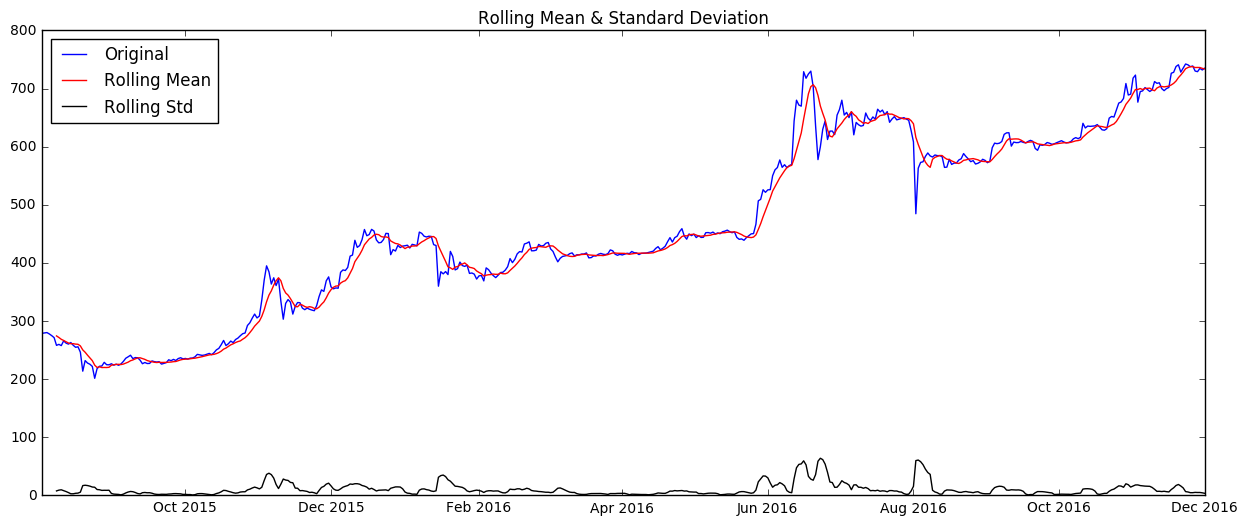

Results of Dickey-Fuller Test:
Test Statistic                  -0.578216
p-value                          0.875829
#Lags Used                       0.000000
Number of Observations Used    484.000000
Critical Value (10%)            -2.569961
Critical Value (1%)             -3.443933
Critical Value (5%)             -2.867530
dtype: float64


In [291]:
test_stationarity(ts)

We can notice that this is not stationary series as the mean increases (very slightly). Test statistic value is a lot bigger than critical value which proves that it is problematic to work on the current graph.

<h1> Making Time Series Stationary </h1>

We have to eliminate <em>Trend</em> which is a varying mean overtime and the <em>Seasonality</em> which is a variation at the specific timeframe.

Transformatiion is one of the methods to eliminate trend. Here we can try log to  penalize higher values more than smaller values.

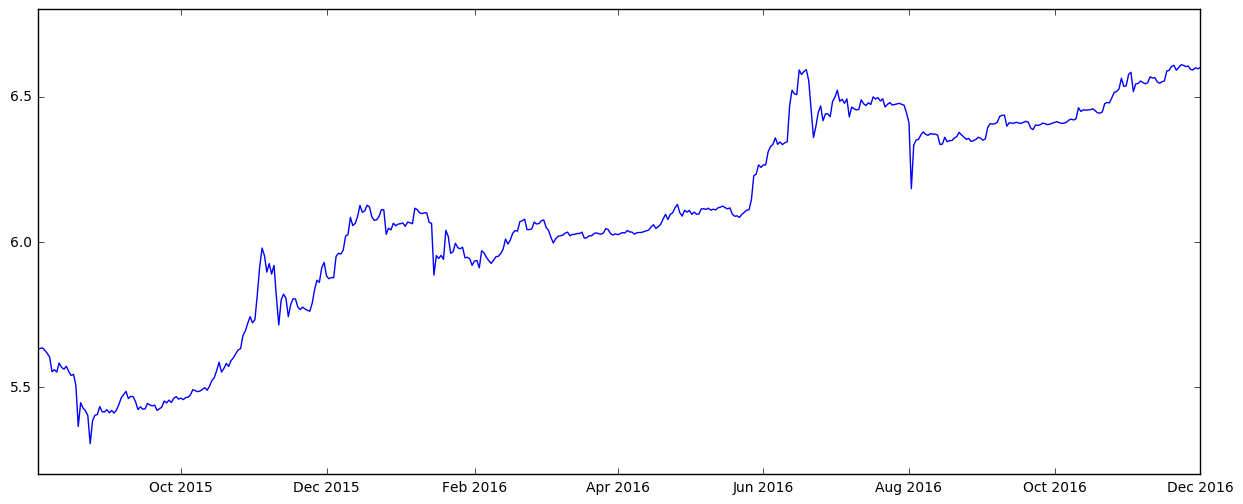

In [292]:
ts_log = np.log(ts)
plt.plot(ts_log)

I is a lot easier to forward tren in the data. To estimate/model we can use different technique s such as 
<ul>
    <li>Aggregation – taking average for a time period like monthly/weekly averages
    <li>Smoothing – taking rolling averages
    <li>Polynomial Fitting – fit a regression model
</ul>

<h2> Moving Avarage

C:\Users\Vytas\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=90).mean()
  if __name__ == '__main__':


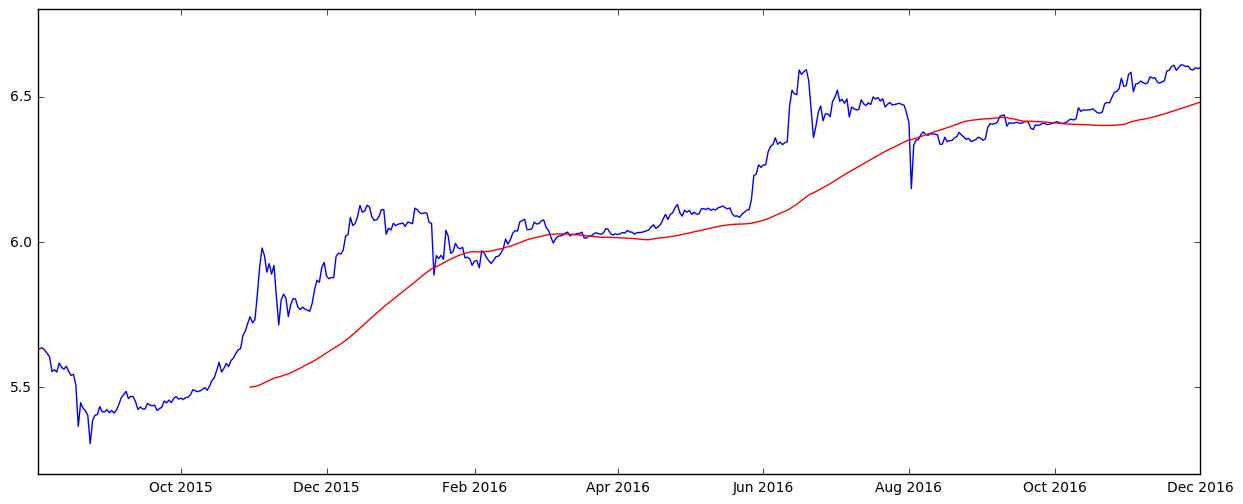

In [293]:
moving_avg = pd.rolling_mean(ts_log, window = 90)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [294]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(20)

Date
2015-08-02   NaN
2015-08-03   NaN
2015-08-04   NaN
2015-08-05   NaN
2015-08-06   NaN
2015-08-07   NaN
2015-08-08   NaN
2015-08-09   NaN
2015-08-10   NaN
2015-08-11   NaN
2015-08-12   NaN
2015-08-13   NaN
2015-08-14   NaN
2015-08-15   NaN
2015-08-16   NaN
2015-08-17   NaN
2015-08-18   NaN
2015-08-19   NaN
2015-08-20   NaN
2015-08-21   NaN
Name: Last, dtype: float64

C:\Users\Vytas\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=7).mean()
C:\Users\Vytas\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=7).std()


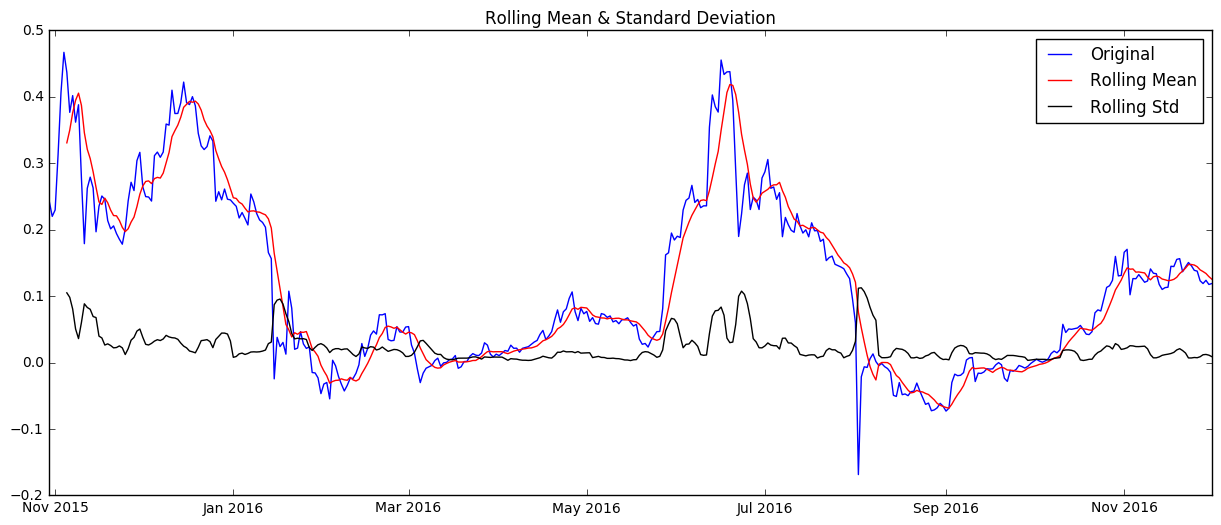

Results of Dickey-Fuller Test:
Test Statistic                  -2.838423
p-value                          0.052991
#Lags Used                       5.000000
Number of Observations Used    390.000000
Critical Value (10%)            -2.570733
Critical Value (1%)             -3.447229
Critical Value (5%)             -2.868980
dtype: float64


In [295]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

Test statistics value is smaller then 5% so its good

<h2>Exponentially weighted moving average

C:\Users\Vytas\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=0,adjust=True,halflife=60,ignore_na=False).mean()
  if __name__ == '__main__':


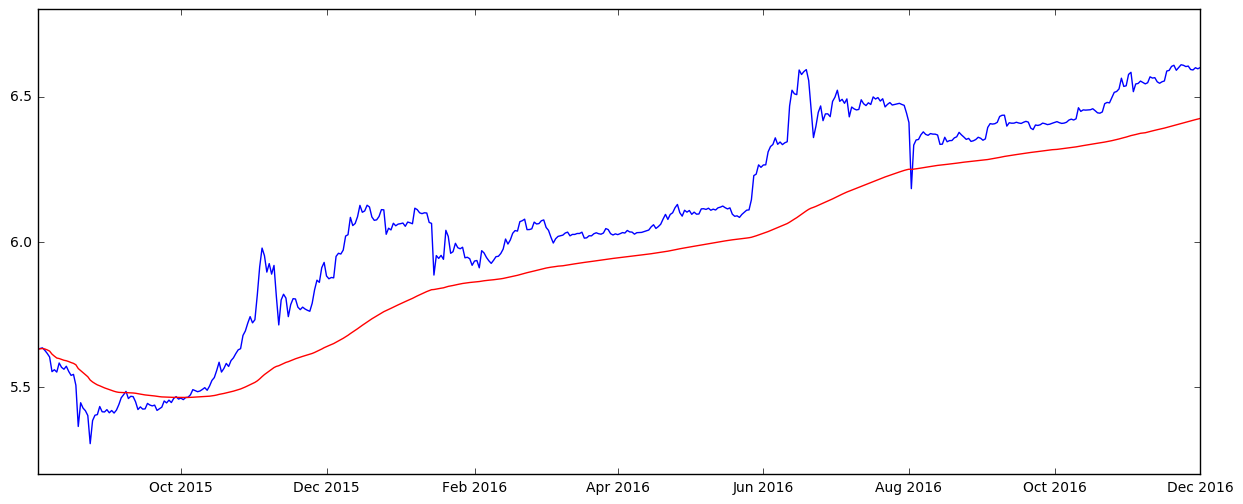

In [296]:
expwighted_avg = pd.ewma(ts_log, halflife=60)
# 'halflife’ defines the amount of exponential decay.
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

C:\Users\Vytas\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=7).mean()
C:\Users\Vytas\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=7).std()


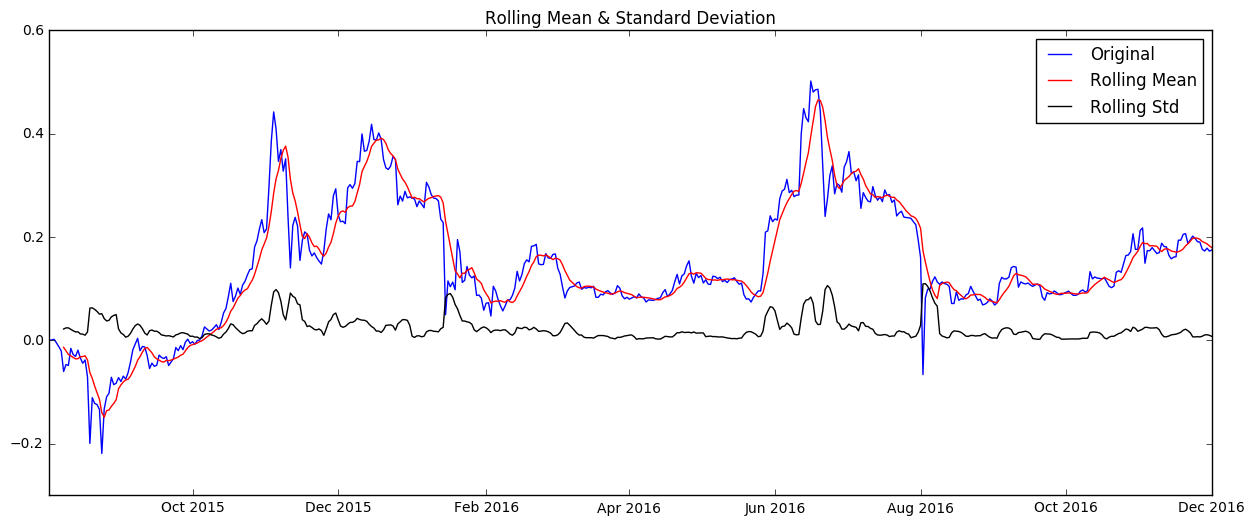

Results of Dickey-Fuller Test:
Test Statistic                  -2.800318
p-value                          0.058228
#Lags Used                       0.000000
Number of Observations Used    484.000000
Critical Value (10%)            -2.569961
Critical Value (1%)             -3.443933
Critical Value (5%)             -2.867530
dtype: float64


In [297]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

This Time Series has even less variation

<h2> Differencing

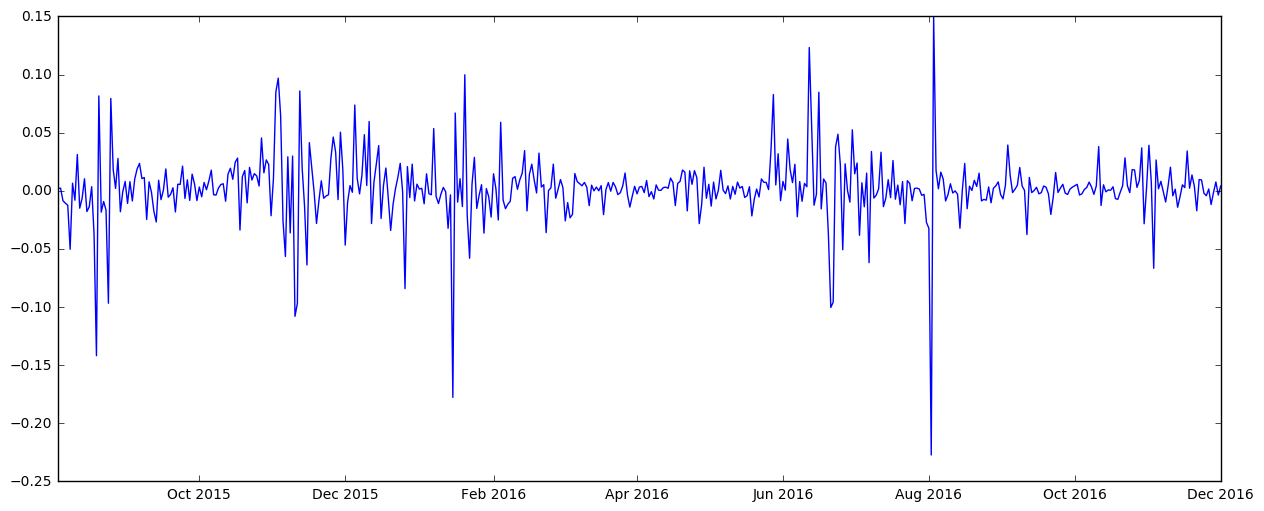

In [298]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

C:\Users\Vytas\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=7).mean()
C:\Users\Vytas\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=7).std()


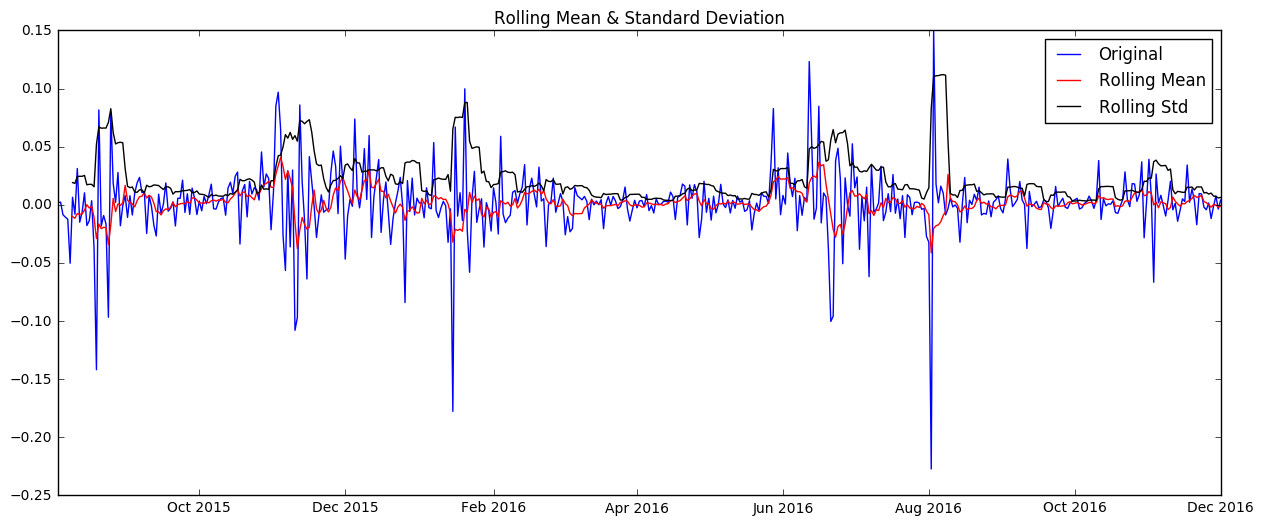

Results of Dickey-Fuller Test:
Test Statistic                -1.702207e+01
p-value                        8.442834e-30
#Lags Used                     1.000000e+00
Number of Observations Used    4.820000e+02
Critical Value (10%)          -2.569974e+00
Critical Value (1%)           -3.443990e+00
Critical Value (5%)           -2.867555e+00
dtype: float64


In [299]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

Here we can notice the variations even smaller

<h2>Decomposing

C:\Users\Vytas\Anaconda3\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


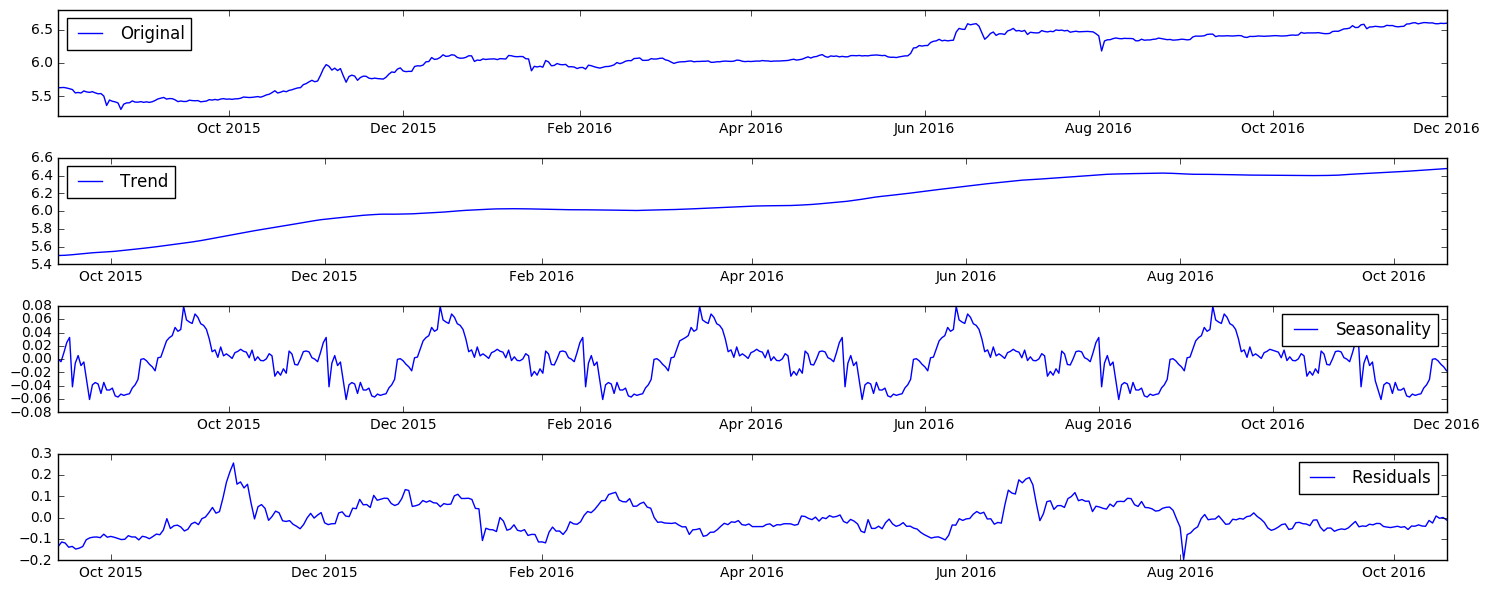

In [398]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq = 90)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

C:\Users\Vytas\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=7).mean()
C:\Users\Vytas\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=7).std()


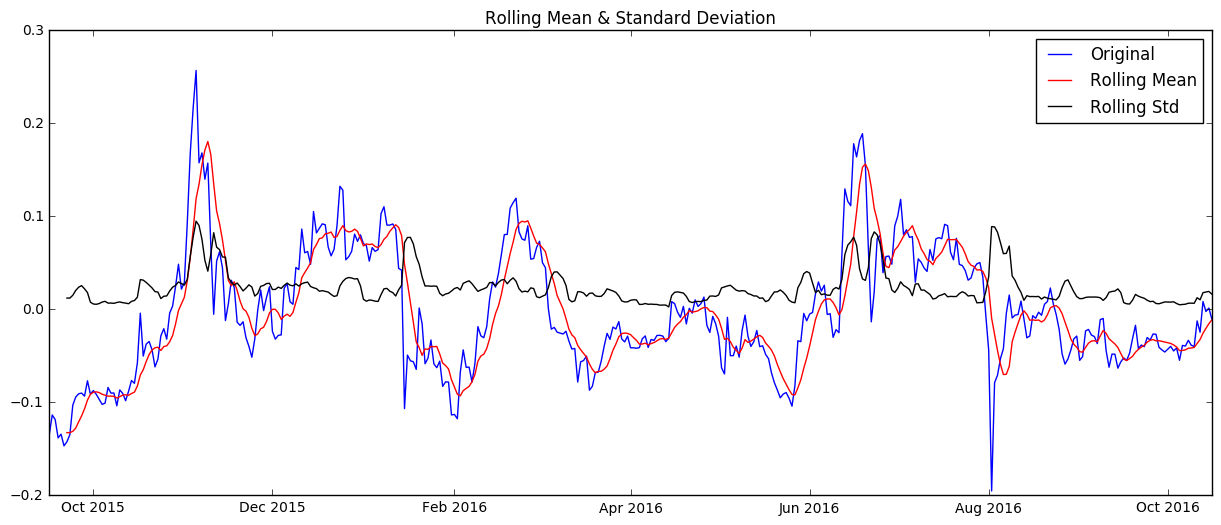

Results of Dickey-Fuller Test:
Test Statistic                  -4.181357
p-value                          0.000708
#Lags Used                       4.000000
Number of Observations Used    390.000000
Critical Value (10%)            -2.570733
Critical Value (1%)             -3.447229
Critical Value (5%)             -2.868980
dtype: float64


In [399]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

It is good, but not as good as difference.

<h1> Forecasting Time Series

<h2> ACF and PACF plots

In [400]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [401]:
lag_acf = acf(ts_log_decompose, nlags=20)
lag_pacf = pacf(ts_log_decompose, nlags=20, method='ols')#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

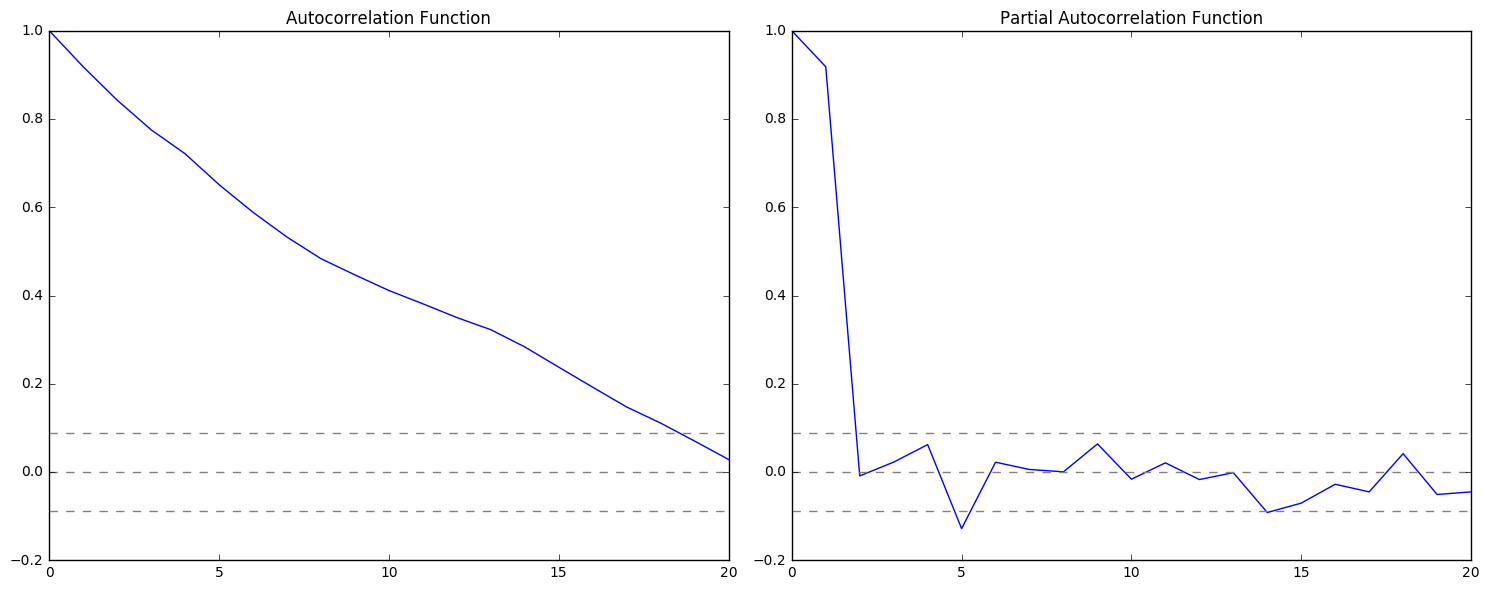

In [402]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


We can notice p = 1, q = 1, d = 10

<h2> ARIMA

In [403]:
from statsmodels.tsa.arima_model import ARIMA

<h3>AR Model

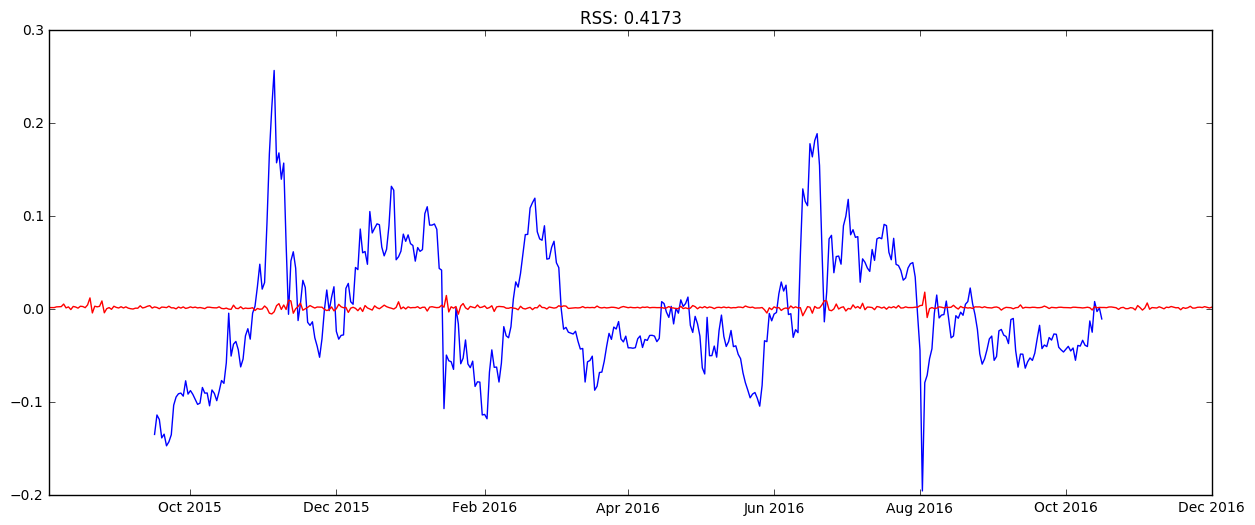

In [418]:
model = ARIMA(ts_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_decompose)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

<h3> MA Model

In [419]:
# model = ARIMA(ts_log, order=(0, 1, 1))  
# results_MA = model.fit(disp=-1)  
# plt.plot(ts_log_decompose)
# plt.plot(results_MA.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

<h3>Combine Model

In [420]:
# model = ARIMA(ts_log, order=(1, 1, 1))  
# results_ARIMA = model.fit(disp=-1)  
# plt.plot(ts_log_decompose)
# plt.plot(results_ARIMA.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [421]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Date
2015-08-03    0.002003
2015-08-04    0.002004
2015-08-05    0.001977
2015-08-06    0.002874
2015-08-07    0.003444
dtype: float64

In [422]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Date
2015-08-03    0.002003
2015-08-04    0.004006
2015-08-05    0.005984
2015-08-06    0.008857
2015-08-07    0.012301
dtype: float64

In [423]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index )
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2015-08-02    5.631212
2015-08-03    5.633214
2015-08-04    5.635218
2015-08-05    5.637195
2015-08-06    5.640069
dtype: float64

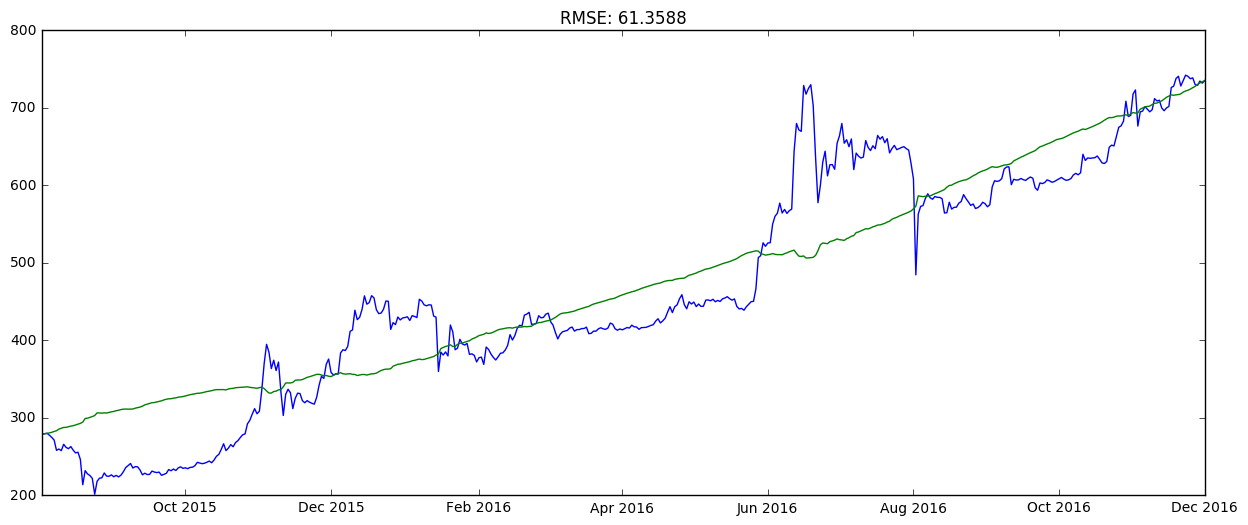

In [424]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))